# Imports

Analyse de la parité au sein d'une entreprise :
- Qui est le client : l'entreprise en question
-  Objectif : leur faire une analyse globale sur la parité au sein de leur entreprise, que ce soit en termes de salaire, de bonus, dans les domaines d’activités etc.

## Import des librairies

In [264]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Import des datasets

In [265]:
info_pro = pd.read_excel("info_pro.xlsx", engine = "openpyxl")

In [266]:
remuneration = pd.read_excel("remuneration.xlsx")

In [267]:
salaries = pd.read_excel("Salariés.xlsx")

# Cleaning

L'objectif est de nettoyer mes données pour qu'elles soient prêtes pour la vizualisation 

## nettoyage du dataframe info_pro 

In [268]:
info_pro

,id_salarié,Ancienneté_an,Distance domicile/Travail,Service,Work_accident,Niveau de satisfaction
0,16000206-8278,12.6,59.0,Marketing,Non,67.0
1,16011205-0331,11.8,31.0,Commercial,Oui,66.0
2,16020327-1465,11.9,65.0,RH,Non,59.0
3,16020701-3376,10.2,59.0,Compta Finances,Non,60.0
4,16020725-8401,7.9,59.0,Consultant,Non,34.0
...,...,...,...,...,...,...
252,16960906-7989,3.3,15.0,R&D,Oui,81.0
253,16970415-1050,21.7,59.0,Consultant,Non,98.0
254,16981206-3817,13.0,68.0,RH,Oui,62.0
255,16990414-3527,10.8,32.0,Consultant,Non,39.0


Basic information about the data with info and describe 

In [269]:
info_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_salarié                 257 non-null    object 
 1   Ancienneté_an              256 non-null    float64
 2   Distance domicile/Travail  256 non-null    float64
 3   Service                    256 non-null    object 
 4   Work_accident              256 non-null    object 
 5   Niveau de satisfaction     256 non-null    float64
dtypes: float64(3), object(3)
memory usage: 12.2+ KB


- ce dataframe possède 6 colonnes, 257 lignes.
- on peut déjà voir que la dernière ligne possèdent un id_salarié, mais que toutes ces autres cellules sont des valeurs manquantes
- A part ça on peut supposer qu'il n'y a pas de NaN

In [270]:
info_pro.describe()

,Ancienneté_an,Distance domicile/Travail,Niveau de satisfaction
count,256.000000,256.000000,256.000000
mean,13.160938,38.433594,50.687500
std,7.020684,19.834301,27.837413
min,0.300000,3.000000,1.000000
25%,7.375000,22.000000,30.000000
50%,12.750000,40.500000,50.500000
75%,19.300000,57.000000,73.000000
max,25.000000,70.000000,100.000000


vérifions qu'il n'y a pas de duplicates

In [271]:
info_pro.duplicated().sum()

0

La function retourne 0, il n'y a donc pas de duplicates dans ce dataframe

Verifions qs'il y'a des valeurs manaquantes dans nos colonnes 

In [272]:
info_pro.isnull().sum()

id_salarié                   0
Ancienneté_an                1
Distance domicile/Travail    1
Service                      1
Work_accident                1
Niveau de satisfaction       1
dtype: int64

Ok, il y'a bien une lignes qui ne possède aucune information à part l'ID du salarié

remplaçons les valeurs manquantes de cette ligne par la moyenne

In [273]:
info_pro_no_nan = info_pro.fillna(np.mean)

In [274]:
info_pro_no_nan.isnull().sum()

id_salarié                   0
Ancienneté_an                0
Distance domicile/Travail    0
Service                      0
Work_accident                0
Niveau de satisfaction       0
dtype: int64

## nettoyage du dataframe remuneration

In [275]:
remuneration

,id_salarié,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion
0,16990924-2829,CDI,35.0,9873.5000,13.0,0.0,0.0
1,16990414-3527,CDI,35.0,4296.7167,39.0,0.0,1.0
2,16981206-3817,CDI,35.0,3705.2167,29.0,1.0,1.0
3,16970415-1050,CDI,35.0,1697.1500,17.0,1.0,0.0
4,16960906-7989,CDD,35.0,2848.3000,15.0,1.0,0.0
...,...,...,...,...,...,...,...
252,16020725-8401,CDI,35.0,7304.2667,17.0,1.0,0.0
253,16020701-3376,CDI,35.0,8328.0167,14.0,1.0,0.0
254,16020327-1465,CDI,32.0,8860.8000,19.0,1.0,1.0
255,16011205-0331,CDI,24.0,4974.3200,32.0,0.0,1.0


In [276]:
remuneration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_salarié            257 non-null    object 
 1   Contrat               256 non-null    object 
 2   Durée hebdo           256 non-null    float64
 3   Salaire base mensuel  256 non-null    float64
 4   %variable_moyen       256 non-null    float64
 5   Augmentation          241 non-null    float64
 6   Promotion             241 non-null    float64
dtypes: float64(5), object(2)
memory usage: 14.2+ KB


- 7 colonnes, 257 lignes
- On peut déjà apercevoir quelques nan surtout dans les colonnes Augmentation et Promotions
- Mais ces NaN sont surement du au faite que ces salariés n'ont pas eu d'augmentation ou de promotion

In [277]:
remuneration.describe()

,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion
count,256.000000,256.000000,256.000000,241.000000,241.000000
mean,33.871094,5326.530626,20.027344,0.518672,0.518672
std,3.203397,2505.493530,11.529809,0.500691,0.500691
min,24.000000,1059.760000,0.000000,0.000000,0.000000
25%,35.000000,3111.918325,10.000000,0.000000,0.000000
50%,35.000000,5084.625000,19.000000,1.000000,1.000000
75%,35.000000,7407.020850,30.000000,1.000000,1.000000
max,35.000000,9999.383300,40.000000,1.000000,1.000000


duplicate ?

In [278]:
remuneration.duplicated().sum()

0

Il n'y a aucun duplicate

regardons de plus près nos valeurs manquantes

In [279]:
remuneration.loc[remuneration["Contrat"].isnull()]

,id_salarié,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion
187,16301224-3147,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
remuneration.loc[remuneration["Promotion"] == 0]

,id_salarié,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion
0,16990924-2829,CDI,35.0,9873.5000,13.0,0.0,0.0
3,16970415-1050,CDI,35.0,1697.1500,17.0,1.0,0.0
4,16960906-7989,CDD,35.0,2848.3000,15.0,1.0,0.0
5,16960628-0338,CDI,35.0,5464.5500,34.0,0.0,0.0
9,16950514-2464,CDI,35.0,2769.4333,33.0,0.0,0.0
...,...,...,...,...,...,...,...
248,16030828-8604,CDI,35.0,8126.3000,36.0,1.0,0.0
250,16021125-4271,CDI,35.0,1590.9833,30.0,1.0,0.0
251,16021124-8356,CDI,35.0,7637.9333,21.0,1.0,0.0
252,16020725-8401,CDI,35.0,7304.2667,17.0,1.0,0.0


In [281]:
remuneration.loc[remuneration["Augmentation"] == 0]

,id_salarié,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion
0,16990924-2829,CDI,35.0,9873.5000,13.0,0.0,0.0
1,16990414-3527,CDI,35.0,4296.7167,39.0,0.0,1.0
5,16960628-0338,CDI,35.0,5464.5500,34.0,0.0,0.0
6,16960619-9017,CDI,35.0,9999.3833,27.0,0.0,1.0
7,16951117-9468,CDI,24.0,3116.8800,37.0,0.0,1.0
...,...,...,...,...,...,...,...
235,16090608-0239,CDI,24.0,3060.7200,6.0,0.0,1.0
236,16090206-9129,CDI,35.0,3459.5167,30.0,0.0,0.0
243,16050721-8014,CDI,35.0,5293.1667,39.0,0.0,1.0
249,16030220-7121,CDI,35.0,9782.5000,38.0,0.0,1.0


In [282]:
clients_sans_benef = remuneration.loc[(remuneration["Augmentation"] == 0) & (remuneration["Promotion"] == 0)]

In [283]:
clients_sans_benef

,id_salarié,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion
0,16990924-2829,CDI,35.0,9873.5000,13.0,0.0,0.0
5,16960628-0338,CDI,35.0,5464.5500,34.0,0.0,0.0
9,16950514-2464,CDI,35.0,2769.4333,33.0,0.0,0.0
16,16920528-2461,CDI,35.0,8458.4500,1.0,0.0,0.0
18,16920105-1209,CDI,35.0,3097.0333,13.0,0.0,0.0
21,16910810-9712,CDI,35.0,1873.0833,27.0,0.0,0.0
34,16860412-1965,CDI,35.0,3232.0167,35.0,0.0,0.0
37,16850330-5826,CDI,35.0,9069.6667,1.0,0.0,0.0
39,16831218-0485,CDI,35.0,7157.1500,3.0,0.0,0.0
41,16820822-2953,CDI,35.0,2070.2500,24.0,0.0,0.0


In [284]:
clients_sans_benef.shape

(55, 7)

Nous n'avons aucune information sur ce salarié, je le drop

In [285]:
remuneration_1 = remuneration.drop(187)

In [286]:
remuneration_1.isnull().sum()

id_salarié               0
Contrat                  0
Durée hebdo              0
Salaire base mensuel     0
%variable_moyen          0
Augmentation            15
Promotion               15
dtype: int64

les NaN restants viennent des colonnes Augmentation et Promotion, voyons voir ces lignes plus en détails :

In [287]:
no_promotion_augmentation = remuneration_1.loc[(remuneration_1["Augmentation"].isnull() & remuneration_1["Promotion"].isnull())]

In [288]:
no_promotion_augmentation

,id_salarié,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion
26,16891203-4397,CDD,32.0,2496.0000,21.0,NaN,NaN
46,16810820-7468,CDD,35.0,3168.3167,10.0,NaN,NaN
48,16810711-6330,CDD,35.0,1989.8667,5.0,NaN,NaN
52,16790704-0179,CDD,35.0,3185.0000,3.0,NaN,NaN
56,16770802-4604,CDD,35.0,3033.3333,8.0,NaN,NaN
66,16740208-0084,CDD,35.0,2881.6667,27.0,NaN,NaN
68,16730918-6273,CDD,35.0,2426.6667,21.0,NaN,NaN
82,16690714-7836,CDD,35.0,3640.0000,6.0,NaN,NaN
86,16670913-0147,CDD,35.0,3201.6833,38.0,NaN,NaN
125,16540728-0337,CDD,35.0,2123.3333,39.0,NaN,NaN


In [289]:
no_promotion_augmentation.shape

(15, 7)

In [290]:
remuneration_1["Contrat"].value_counts()

CDI    240
CDD     16
Name: Contrat, dtype: int64

In [291]:
remuneration_1.loc[remuneration_1["Contrat"] == "CDD"]

,id_salarié,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion
4,16960906-7989,CDD,35.0,2848.3000,15.0,1.0,0.0
26,16891203-4397,CDD,32.0,2496.0000,21.0,NaN,NaN
46,16810820-7468,CDD,35.0,3168.3167,10.0,NaN,NaN
48,16810711-6330,CDD,35.0,1989.8667,5.0,NaN,NaN
52,16790704-0179,CDD,35.0,3185.0000,3.0,NaN,NaN
56,16770802-4604,CDD,35.0,3033.3333,8.0,NaN,NaN
66,16740208-0084,CDD,35.0,2881.6667,27.0,NaN,NaN
68,16730918-6273,CDD,35.0,2426.6667,21.0,NaN,NaN
82,16690714-7836,CDD,35.0,3640.0000,6.0,NaN,NaN
86,16670913-0147,CDD,35.0,3201.6833,38.0,NaN,NaN


ce qu'on peut observer :
- tous ces salariés sont en contrat CDD 
- Ils ont tous un salaire inférieur à la moyenne 
- Il n'y a qu'un seul salariés en CDD qui a reçu une augmentation, surement suite à un renouvellement de contrat

Conclusion : Il est très probable que ces NaN viennent du fait qu'ils ne peuvent pas recevoir d'augmentation/promotion vu qu'ils sont en CDD. Donc à une décision de l'entreprise de ne pas augmenter ou faire une promotion aux salariés en CDD

je vais donc remplacer ces NaN par 0

In [292]:
remuneration_1.describe()

,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion
count,256.000000,256.000000,256.000000,241.000000,241.000000
mean,33.871094,5326.530626,20.027344,0.518672,0.518672
std,3.203397,2505.493530,11.529809,0.500691,0.500691
min,24.000000,1059.760000,0.000000,0.000000,0.000000
25%,35.000000,3111.918325,10.000000,0.000000,0.000000
50%,35.000000,5084.625000,19.000000,1.000000,1.000000
75%,35.000000,7407.020850,30.000000,1.000000,1.000000
max,35.000000,9999.383300,40.000000,1.000000,1.000000


In [293]:
remuneration_1["Augmentation"].replace(np.nan, 0, inplace = True)

In [294]:
remuneration_1["Promotion"].replace(np.nan, 0, inplace = True)

In [295]:
remuneration_1.isnull().sum()

id_salarié              0
Contrat                 0
Durée hebdo             0
Salaire base mensuel    0
%variable_moyen         0
Augmentation            0
Promotion               0
dtype: int64

In [296]:
remuneration_1["Promotion"].unique()

array([0., 1.])

In [297]:
remuneration_1["Augmentation"].unique()

array([0., 1.])

## nettoyage du dataframe salaries

In [298]:
salaries

,id_salarié,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants
0,16920105-1209,F,Solenne Delannoy,607958599.0,1955-07-07,Célibataire,1.0
1,16661123-8764,H,Nicolas Jaccoud,660029842.0,1970-09-22,Célibataire,3.0
2,16230718-4297,F,Alexandra Auguste,629910592.0,1965-03-01,Marié,1.0
3,16130305-6954,F,Marie-Claire Besnard,685888970.0,1963-09-02,NaN,1.0
4,16360125-5924,F,Marie Berengar,624840475.0,1959-04-02,Marié,3.0
...,...,...,...,...,...,...,...
252,16670913-0147,F,Jessica Brousseau,698491351.0,1990-05-20,Célibataire,1.0
253,16730918-6273,F,Anne Beaumanoir,670650694.0,1967-01-03,Marié,1.0
254,16770802-4604,F,Christelle Tomas,629546308.0,1956-03-17,Marié,2.0
255,16451016-1336,H,Rémy Thibodeaux,641158665.0,1977-07-06,Marié,2.0


In [299]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_salarié      257 non-null    object        
 1   Sexe            256 non-null    object        
 2   Prénom/Nom      256 non-null    object        
 3   Telephone       256 non-null    float64       
 4   Date_naissance  256 non-null    datetime64[ns]
 5   Etat Civil      174 non-null    object        
 6   Enfants         256 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 14.2+ KB


info : 
- il y'a 7 colonnes, 257 lignes.
- 1 NaN pour quelques colonnes, mais beaucoup plus pour la colonne Etat-Civil.

In [300]:
salaries.describe()

,Telephone,Enfants
count,2.560000e+02,256.000000
mean,6.511928e+08,1.460938
std,2.915357e+07,1.123038
min,6.003126e+08,0.000000
25%,6.251080e+08,0.000000
50%,6.514391e+08,1.000000
75%,6.783984e+08,2.000000
max,6.991239e+08,3.000000


duplicate ?

In [301]:
salaries.duplicated().sum()

0

il n'y a pas de duplicate 

regardons de plus près les valeurs manquantes, pour savoir si je les remplaces ou les drop

In [302]:
salaries.isnull().sum()

id_salarié         0
Sexe               1
Prénom/Nom         1
Telephone          1
Date_naissance     1
Etat Civil        83
Enfants            1
dtype: int64

In [303]:
salaries.loc[salaries["Sexe"].isnull()]

,id_salarié,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants
256,16301224-3147,NaN,NaN,NaN,NaT,NaN,NaN


Nous n'avons aucune information sur ce salarié, je la drop.

In [304]:
salaries_1 = salaries.drop(256)

In [305]:
salaries_1.isnull().sum()

id_salarié         0
Sexe               0
Prénom/Nom         0
Telephone          0
Date_naissance     0
Etat Civil        82
Enfants            0
dtype: int64

Il reste encore 83 salaries qui ou il y'a des NaN sur la colonne état civil, regardons en détail

In [306]:
salaries_no_etat_civil = salaries.loc[salaries["Etat Civil"].isnull()]

In [307]:
salaries_no_etat_civil

,id_salarié,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants
3,16130305-6954,F,Marie-Claire Besnard,685888970.0,1963-09-02,NaN,1.0
8,16220420-6227,H,Christophe Mallette,683794378.0,1975-02-05,NaN,0.0
11,16080130-8107,H,Thaddée Batteux,678070755.0,1974-05-13,NaN,0.0
16,16750302-5590,F,Mélissa Lecerf,670801501.0,1977-11-13,NaN,1.0
17,16390127-6224,F,Lucie Gaudreau,641131944.0,1965-10-25,NaN,1.0
...,...,...,...,...,...,...,...
243,16540728-0337,F,Nikita Brosseau,660672943.0,1959-12-26,NaN,1.0
246,16810711-6330,H,Anatole Girault,683124664.0,1980-11-25,NaN,0.0
249,16091122-3147,F,Déborah Hennequin,611601056.0,1984-03-03,NaN,3.0
250,16690714-7836,F,Nancy Delacroix,682388988.0,1971-03-25,NaN,1.0


In [308]:
salaries_no_etat_civil["Sexe"].value_counts()

F    42
H    40
Name: Sexe, dtype: int64

je regarde les valeurs possibles de la colonne Etat Civil

In [309]:
salaries_1["Etat Civil"].unique()

array(['Célibataire', 'Marié', nan], dtype=object)

Je pars du principe que ces 83 valeurs sont manquantes pour ces deux principales raisons :
- Le salaries n'a pas voulu partager cette information à son entreprise 
- L'entreprise à oublier de renseigner cette information

je remplace ces NaN par "non présicé"

In [310]:
salaries_1["Etat Civil"].replace(np.nan, 'non précisé', inplace = True)

In [311]:
salaries_1

,id_salarié,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants
0,16920105-1209,F,Solenne Delannoy,607958599.0,1955-07-07,Célibataire,1.0
1,16661123-8764,H,Nicolas Jaccoud,660029842.0,1970-09-22,Célibataire,3.0
2,16230718-4297,F,Alexandra Auguste,629910592.0,1965-03-01,Marié,1.0
3,16130305-6954,F,Marie-Claire Besnard,685888970.0,1963-09-02,non précisé,1.0
4,16360125-5924,F,Marie Berengar,624840475.0,1959-04-02,Marié,3.0
...,...,...,...,...,...,...,...
251,16081104-1011,F,Thècle Baudet,653326499.0,1985-07-22,Marié,3.0
252,16670913-0147,F,Jessica Brousseau,698491351.0,1990-05-20,Célibataire,1.0
253,16730918-6273,F,Anne Beaumanoir,670650694.0,1967-01-03,Marié,1.0
254,16770802-4604,F,Christelle Tomas,629546308.0,1956-03-17,Marié,2.0


In [312]:
salaries_1.isnull().sum()

id_salarié        0
Sexe              0
Prénom/Nom        0
Telephone         0
Date_naissance    0
Etat Civil        0
Enfants           0
dtype: int64

je n'ai plus de NaN dans mon dataframe

ajouter une nouvelle colonne "age" à mon dataframe facilitera m'on analyse

In [313]:
salaries_1["Date_naissance"].dt.year

0      1955
1      1970
2      1965
3      1963
4      1959
       ... 
251    1985
252    1990
253    1967
254    1956
255    1977
Name: Date_naissance, Length: 256, dtype: int64

In [314]:
salaries_1 = salaries_1.assign(age = 2023 - salaries_1["Date_naissance"].dt.year)

In [315]:
salaries_1

,id_salarié,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants,age
0,16920105-1209,F,Solenne Delannoy,607958599.0,1955-07-07,Célibataire,1.0,68
1,16661123-8764,H,Nicolas Jaccoud,660029842.0,1970-09-22,Célibataire,3.0,53
2,16230718-4297,F,Alexandra Auguste,629910592.0,1965-03-01,Marié,1.0,58
3,16130305-6954,F,Marie-Claire Besnard,685888970.0,1963-09-02,non précisé,1.0,60
4,16360125-5924,F,Marie Berengar,624840475.0,1959-04-02,Marié,3.0,64
...,...,...,...,...,...,...,...,...
251,16081104-1011,F,Thècle Baudet,653326499.0,1985-07-22,Marié,3.0,38
252,16670913-0147,F,Jessica Brousseau,698491351.0,1990-05-20,Célibataire,1.0,33
253,16730918-6273,F,Anne Beaumanoir,670650694.0,1967-01-03,Marié,1.0,56
254,16770802-4604,F,Christelle Tomas,629546308.0,1956-03-17,Marié,2.0,67


## Merger mes 3 dataframe en un seul 

la clé pour nos 3 dataframe est la même : Id salarié. Un inner join est parfait vu que les Id des 
clients sont présent dans les 3 dataframe

In [316]:
df_1 = info_pro_no_nan.merge(remuneration_1, on = 'id_salarié', how = "inner")
df = df_1.merge(salaries_1, on = 'id_salarié', how = 'inner')

In [317]:
df

,id_salarié,Ancienneté_an,Distance domicile/Travail,Service,Work_accident,Niveau de satisfaction,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,Augmentation,Promotion,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants,age
0,16000206-8278,12.6,59.0,Marketing,Non,67.0,CDI,35.0,6583.8500,13.0,1.0,1.0,F,Pascale Duclos,677289138.0,1958-12-07,non précisé,2.0,65
1,16011205-0331,11.8,31.0,Commercial,Oui,66.0,CDI,24.0,4974.3200,32.0,0.0,1.0,F,Nicole Affré,640934749.0,1957-04-23,Célibataire,2.0,66
2,16020327-1465,11.9,65.0,RH,Non,59.0,CDI,32.0,8860.8000,19.0,1.0,1.0,F,Marie-Claire Bachelet,609243379.0,1973-08-19,Célibataire,3.0,50
3,16020701-3376,10.2,59.0,Compta Finances,Non,60.0,CDI,35.0,8328.0167,14.0,1.0,0.0,F,Claire Chagnon,683289092.0,1981-10-09,Célibataire,1.0,42
4,16020725-8401,7.9,59.0,Consultant,Non,34.0,CDI,35.0,7304.2667,17.0,1.0,0.0,F,Séverine Gaumont,684333280.0,1979-04-26,Marié,0.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,16960906-7989,3.3,15.0,R&D,Oui,81.0,CDD,35.0,2848.3000,15.0,1.0,0.0,H,Fabien Cerf,626873728.0,1983-03-04,non précisé,0.0,40
252,16970415-1050,21.7,59.0,Consultant,Non,98.0,CDI,35.0,1697.1500,17.0,1.0,0.0,H,Denis Vérany,607599922.0,1963-10-25,Marié,3.0,60
253,16981206-3817,13.0,68.0,RH,Oui,62.0,CDI,35.0,3705.2167,29.0,1.0,1.0,F,Flora Lajoie,651981019.0,1970-01-19,non précisé,1.0,53
254,16990414-3527,10.8,32.0,Consultant,Non,39.0,CDI,35.0,4296.7167,39.0,0.0,1.0,H,Aurélien Beaubois,660488569.0,1955-07-01,Célibataire,0.0,68


## Change/add Columns 

j'ajoute la colonne tranche d'age pour m'aider dans mon analyse

In [318]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]

df["tranche_age"] = pd.cut(df["age"], bins, labels)

je remplaces les valeurs de la "Work_accident" par 0 si le salariés n'a pas eu d'accident, et 1 si il en a eu.

In [319]:
df["Work_accident_bin"] = df["Work_accident"].replace(["Oui", "Non"], ["1", "0"])

In [320]:
df

,id_salarié,Ancienneté_an,Distance domicile/Travail,Service,Work_accident,Niveau de satisfaction,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,...,Promotion,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants,age,tranche_age,Work_accident_bin
0,16000206-8278,12.6,59.0,Marketing,Non,67.0,CDI,35.0,6583.8500,13.0,...,1.0,F,Pascale Duclos,677289138.0,1958-12-07,non précisé,2.0,65,"(60, 70]",0
1,16011205-0331,11.8,31.0,Commercial,Oui,66.0,CDI,24.0,4974.3200,32.0,...,1.0,F,Nicole Affré,640934749.0,1957-04-23,Célibataire,2.0,66,"(60, 70]",1
2,16020327-1465,11.9,65.0,RH,Non,59.0,CDI,32.0,8860.8000,19.0,...,1.0,F,Marie-Claire Bachelet,609243379.0,1973-08-19,Célibataire,3.0,50,"(40, 50]",0
3,16020701-3376,10.2,59.0,Compta Finances,Non,60.0,CDI,35.0,8328.0167,14.0,...,0.0,F,Claire Chagnon,683289092.0,1981-10-09,Célibataire,1.0,42,"(40, 50]",0
4,16020725-8401,7.9,59.0,Consultant,Non,34.0,CDI,35.0,7304.2667,17.0,...,0.0,F,Séverine Gaumont,684333280.0,1979-04-26,Marié,0.0,44,"(40, 50]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,16960906-7989,3.3,15.0,R&D,Oui,81.0,CDD,35.0,2848.3000,15.0,...,0.0,H,Fabien Cerf,626873728.0,1983-03-04,non précisé,0.0,40,"(30, 40]",1
252,16970415-1050,21.7,59.0,Consultant,Non,98.0,CDI,35.0,1697.1500,17.0,...,0.0,H,Denis Vérany,607599922.0,1963-10-25,Marié,3.0,60,"(50, 60]",0
253,16981206-3817,13.0,68.0,RH,Oui,62.0,CDI,35.0,3705.2167,29.0,...,1.0,F,Flora Lajoie,651981019.0,1970-01-19,non précisé,1.0,53,"(50, 60]",1
254,16990414-3527,10.8,32.0,Consultant,Non,39.0,CDI,35.0,4296.7167,39.0,...,1.0,H,Aurélien Beaubois,660488569.0,1955-07-01,Célibataire,0.0,68,"(60, 70]",0


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 255
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id_salarié                 256 non-null    object        
 1   Ancienneté_an              256 non-null    object        
 2   Distance domicile/Travail  256 non-null    object        
 3   Service                    256 non-null    object        
 4   Work_accident              256 non-null    object        
 5   Niveau de satisfaction     256 non-null    object        
 6   Contrat                    256 non-null    object        
 7   Durée hebdo                256 non-null    float64       
 8   Salaire base mensuel       256 non-null    float64       
 9   %variable_moyen            256 non-null    float64       
 10  Augmentation               256 non-null    float64       
 11  Promotion                  256 non-null    float64       
 12  Sexe    

In [322]:
df.isnull().sum()

id_salarié                   0
Ancienneté_an                0
Distance domicile/Travail    0
Service                      0
Work_accident                0
Niveau de satisfaction       0
Contrat                      0
Durée hebdo                  0
Salaire base mensuel         0
%variable_moyen              0
Augmentation                 0
Promotion                    0
Sexe                         0
Prénom/Nom                   0
Telephone                    0
Date_naissance               0
Etat Civil                   0
Enfants                      0
age                          0
tranche_age                  0
Work_accident_bin            0
dtype: int64

Mes données sont prêtes pour être visualisées

# Exploration

In [323]:
df

,id_salarié,Ancienneté_an,Distance domicile/Travail,Service,Work_accident,Niveau de satisfaction,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,...,Promotion,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants,age,tranche_age,Work_accident_bin
0,16000206-8278,12.6,59.0,Marketing,Non,67.0,CDI,35.0,6583.8500,13.0,...,1.0,F,Pascale Duclos,677289138.0,1958-12-07,non précisé,2.0,65,"(60, 70]",0
1,16011205-0331,11.8,31.0,Commercial,Oui,66.0,CDI,24.0,4974.3200,32.0,...,1.0,F,Nicole Affré,640934749.0,1957-04-23,Célibataire,2.0,66,"(60, 70]",1
2,16020327-1465,11.9,65.0,RH,Non,59.0,CDI,32.0,8860.8000,19.0,...,1.0,F,Marie-Claire Bachelet,609243379.0,1973-08-19,Célibataire,3.0,50,"(40, 50]",0
3,16020701-3376,10.2,59.0,Compta Finances,Non,60.0,CDI,35.0,8328.0167,14.0,...,0.0,F,Claire Chagnon,683289092.0,1981-10-09,Célibataire,1.0,42,"(40, 50]",0
4,16020725-8401,7.9,59.0,Consultant,Non,34.0,CDI,35.0,7304.2667,17.0,...,0.0,F,Séverine Gaumont,684333280.0,1979-04-26,Marié,0.0,44,"(40, 50]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,16960906-7989,3.3,15.0,R&D,Oui,81.0,CDD,35.0,2848.3000,15.0,...,0.0,H,Fabien Cerf,626873728.0,1983-03-04,non précisé,0.0,40,"(30, 40]",1
252,16970415-1050,21.7,59.0,Consultant,Non,98.0,CDI,35.0,1697.1500,17.0,...,0.0,H,Denis Vérany,607599922.0,1963-10-25,Marié,3.0,60,"(50, 60]",0
253,16981206-3817,13.0,68.0,RH,Oui,62.0,CDI,35.0,3705.2167,29.0,...,1.0,F,Flora Lajoie,651981019.0,1970-01-19,non précisé,1.0,53,"(50, 60]",1
254,16990414-3527,10.8,32.0,Consultant,Non,39.0,CDI,35.0,4296.7167,39.0,...,1.0,H,Aurélien Beaubois,660488569.0,1955-07-01,Célibataire,0.0,68,"(60, 70]",0


## La part d'homme et de femme dans l'entreprise 

je vais tout simplement commencer par observer le nombre d'homme et de femme dans l'entreprise : 

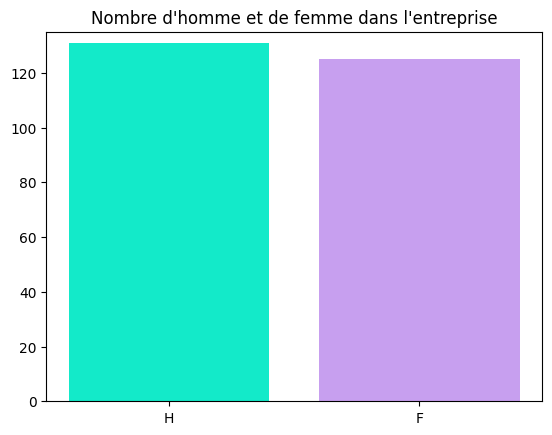

In [324]:
fig, ax = plt.subplots()

x_sexe = df["Sexe"].unique()
y_sexe = df["Sexe"].value_counts()
height = ["H", "F"]
bar_labels = ["F", "H"]
bar_colors = ["#13EAC9", "#C79FEF"]


ax.bar(height, y_sexe, color = bar_colors)
ax.set(ylim = (0, 135))
ax.set_title("Nombre d'homme et de femme dans l'entreprise")

plt.show()

donnuts plot pour voir en pourcentage

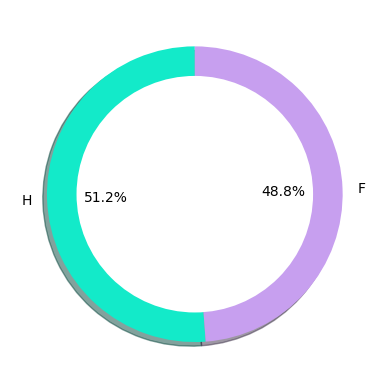

In [325]:
fig, ax = plt.subplots()

pie_labels = ["H", "F"]
pie_colors = ["#13EAC9", "#C79FEF"]
ax.pie(y_sexe, labels = pie_labels, colors = pie_colors, autopct='%1.1f%%', shadow=True,
      startangle=90)

# Changing the pie chart to dont chart

centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

observation :
- il y'a autant de femme que d'homme salariés dans l'entreprise

## Toranado plot pour voir la moyenne des salaires homme et femme par catégorie d'âge

maintenant tornado barplot

In [326]:
age_class = ["30", "40", "50", "60+"]
# age_class = df["tranche_age"].unique()
g = pd.pivot_table(data = df, index = "tranche_age", columns = "Sexe", values = "Salaire base mensuel", aggfunc = np.mean)

In [327]:
g

Sexe,F,H
tranche_age,,
"(30, 40]",4229.781113,5419.575780
"(40, 50]",6193.505809,5580.991005
"(50, 60]",5152.385506,5248.156598
"(60, 70]",4834.584996,5315.310015


In [328]:
gn = g.to_numpy()

gf = gn[:, 0]
gm = gn[:, 1]

gf_int = gf.astype(int)
gm_int = gm.astype(int)

def Convert(lst):
    return [-i for i in lst]

_gm = Convert(gm_int)

In [329]:
fig = go.Figure()
fig.add_trace(go.Bar(y= age_class, x= gf,
                base=0,
                marker_color='#C79FEF',
                name='Femmes',
                text = gf_int,
                textposition = "auto",
                orientation = 'h',
))
fig.add_trace(go.Bar(y=age_class, x= gm,
                base= _gm,
                marker_color='#13EAC9',
                name='Hommes',
                text = _gm,
                textposition = "inside",
                orientation = 'h',
))


fig.update_layout(
    height = 500,
    title_text = 'Salaire mensuel moyen des salariés',
    title_x = 0.48,
    title_y = 0.88
)

fig.update_layout(
    barmode='overlay',
    xaxis_tickangle=-45,
    bargap= 0.50
)

fig.show()

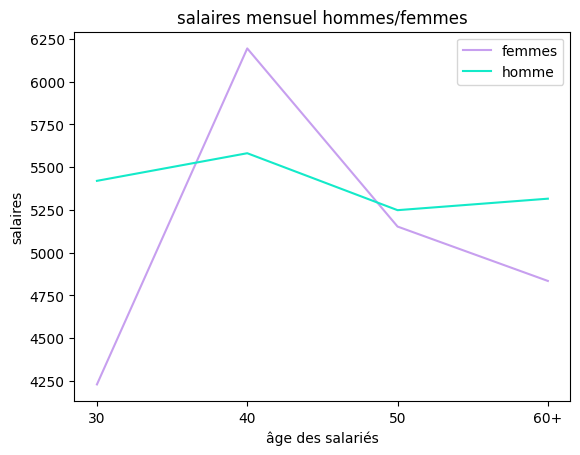

In [330]:
age_class = ["30", "40", "50", "60+"]

fig, ax = plt.subplots()

ax.plot(age_class, gf, label = "femmes", color = "#C79FEF")
ax.plot(age_class, gm, label = "homme", color = '#13EAC9')

ax.set_xlabel("âge des salariés")
ax.set_ylabel("salaires")
ax.set_title("salaires mensuel hommes/femmes")
ax.legend()

plt.show()

Observation:
- Les femmes de 20 à 40 ans ont un salaires moyenne légèrement inférieur aux hommes
- Les femmes de 40-60 on en moyenne un salaire qui est légèrement supérieur aux hommes
- de 60-80+ cette tendence s'inverse

Conclusion :
- D'après les observations, on voit que les différences de salaires reste assez modéré, saif pour les salariés agé de 30 à 40 ans, avec presque 1000 euro de différence, et je pense que les raisons sont les suivantes :
    - Une certain nombre de femmes de 30-40 ans travaillant pour l'entreprise doivent avoir plus de responsabilités que hommes, et cela pourrait les empêcher de travailler à temps plein (comme garder leurs enfants quand ils sont malade, les déposer/chercher à l'école)

- on voit que les femmes de 40-50 on en moyenne un salaire plus élevé que les hommes de 40-60 ans. En générale les femmes n'ont plus à s'occuper autant de leurs enfants vu qu'ils ont grandi.

- ça peut être du aux mentalité, au modèle familiale dans lequel le couple a grandi, qui lors de la naissance du bébé,  renverrait les conjoints vers les rôles traditionnels d’une famille classique. A savoir, maman qui s’occupe des tâches ménagères et papa qui prend en charge l’autorité.

Conclusion_v2 :
- après des analyse plus détaillé, j'ai remarqué que la différence de salaire ne venait pas du fait que les femmes travaillaient moins d'heures hebdo que les hommes du à leurs responsabilité. Elles travaillent autant voir plus qu'eux.
- La différence de salaire vient donc d'autre facteurs :
    - Les femmes de 30-40 ans on un poste moins important que les hommes(30-40)
    - donc moins de promotion
    - et possiblement moins d'augmentation

## chart pour voir si les femmes travaille moins à temps plein que les hommes 

In [331]:
dn_pivot_table = pd.pivot_table(data = df, index = "Sexe", columns = "tranche_age", values = "Durée hebdo", aggfunc = np.mean)

In [332]:
dn_pivot_table

tranche_age,"(30, 40]","(40, 50]","(50, 60]","(60, 70]"
Sexe,,,,
F,35.000000,34.20,33.591837,33.730769
H,33.066667,34.55,33.755102,33.111111


In [333]:
dn_np = dn_pivot_table.to_numpy()
dn_np = dn_np.reshape(8,)

dn_f = dn_np[:4]
dn_m = dn_np[4:]

dn_f = dn_f.astype(int)
dn_m = dn_m.astype(int)
dn_labels = ["30", "40", "50", "60+"]
dn_colors_1 = ["#C79FEF"]
dn_colors_2 = ["#13EAC9"]

In [334]:
dn_np

array([35.        , 34.2       , 33.59183673, 33.73076923, 33.06666667,
       34.55      , 33.75510204, 33.11111111])

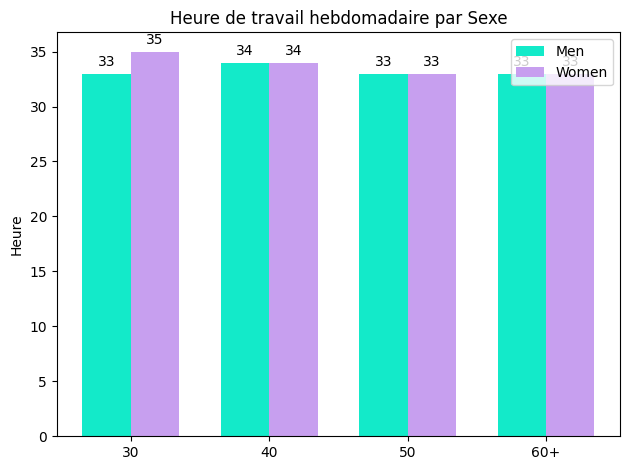

In [335]:
x = np.arange(len(dn_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dn_m, width, label='Men', color = dn_colors_2)
rects2 = ax.bar(x + width/2, dn_f, width, label='Women', color = dn_colors_1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Heure')
ax.set_title("Heure de travail hebdomadaire par Sexe")
ax.set_xticks(x)
ax.set_xticklabels(dn_labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Observation:
- Globalement, les femmes et les hommes travaillent en moyenne le même nombre d'heure.
- Ce n'est donc pas un facteur déterminant concernant le salaire des employé de l'entreprise 

## Graphique pour voir les salariés(femmes) sont moins augmentées que les hommes

In [336]:
sa_pivot_table = pd.pivot_table(data = df,index = "tranche_age", columns = "Sexe",values = "Augmentation", aggfunc = np.sum)

In [337]:
sp_pivot_table = pd.pivot_table(data = df, index = "tranche_age", columns = "Sexe", values = "Promotion", aggfunc = np.sum)

In [338]:
sp_np = sp_pivot_table.to_numpy()

sp_f = sp_np[3:7, 0]
sp_m = sp_np[3:7, 1]

In [339]:
sa_np = sa_pivot_table.to_numpy()

sa_f = sa_np[3:7, 0]
sa_m = sa_np[3:7, 1]

In [396]:
sa_pivot_table[3:7]

Sexe,F,H
tranche_age,,
"(30, 40]",5.0,9.0
"(40, 50]",19.0,13.0
"(50, 60]",32.0,26.0
"(60, 70]",8.0,13.0


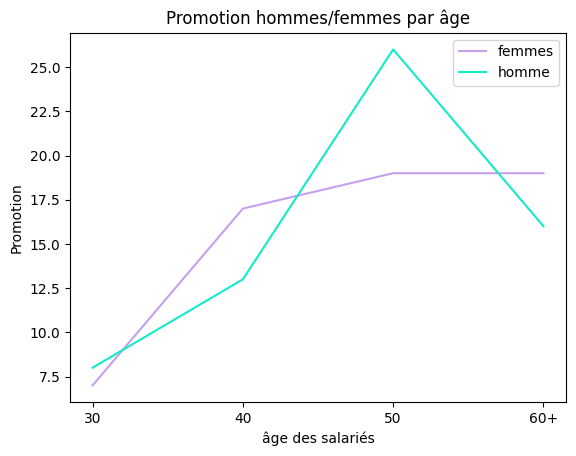

In [340]:
age_class = ["30", "40", "50", "60+"]

fig, ax = plt.subplots()

ax.plot(age_class, sp_f, label = "femmes", color = "#C79FEF")
ax.plot(age_class, sp_m, label = "homme", color = '#13EAC9')

ax.set_xlabel("âge des salariés")
ax.set_ylabel("Promotion")
ax.set_title("Promotion hommes/femmes par âge")
ax.legend()

plt.show()

Observation :
- On voit que jusqu'à 40 ans il n'y a pas de différence du nombre de promotion entre les hommes et les femmes.
- Dans la catégorie d'âge 50-60 ans, on peut par contre clairement voir que les hommes sont plus augmenté que les femmes

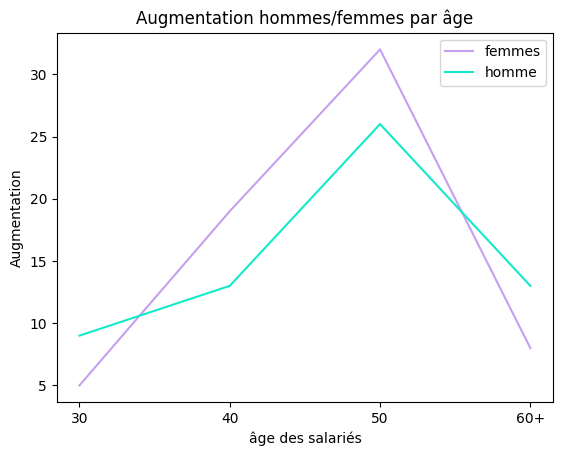

In [341]:
age_class = ["30", "40", "50", "60+"]

fig, ax = plt.subplots()

ax.plot(age_class, sa_f, label = "femmes", color = "#C79FEF")
ax.plot(age_class, sa_m, label = "homme", color = '#13EAC9')

ax.set_xlabel("âge des salariés")
ax.set_ylabel("Augmentation")
ax.set_title("Augmentation hommes/femmes par âge")
ax.legend()

plt.show()

Observation :
- Entre 30-35 ans, les femmes sont moins augmenté que les hommes, ce qui explique leurs différences de salaires. 
- En plus la moyenne de salaire est plus sensible aux outliers vu les effectifs réduit de salariés 30-40 ans, ce qui expliquerait aussi cette différence de 1000 euro. (il y a 23 salariés de moin de 30-40 ans et 14 ont été augmenté)
- Au contraire, à partir de 40 ans jusqu'à 50 ans on voit nettement que les femmes ont reçu plus d'augmentation, ce qui explique aussi pourquoi elles ont en moyenne un salaire plus élevé que les homme dans cette tranche d'âge.

Une bonne question à se poser est Pourquoi est-ce qu'elles ont reçu moins d'augmentation entre 30, 35 ?

## Moyenne des salaires homme/femme en fonction de l'ancienneté des salariés

je veux voir si le salaire change en fonction de l'ancienneté du salarié.



In [342]:
df['An_cienneté'] = pd.cut(df['Ancienneté_an'],
                                     bins=[0,5,10,15,20, 25], labels=['[0, 5]','[5, 10]','[10, 15]','[15, 20]','[20+]'])

In [343]:
pivot_ancienneté = pd.pivot_table(data = df, index = "An_cienneté", columns = "Sexe", values = "Salaire base mensuel",
                                  aggfunc = np.mean)

In [344]:
pivot_ancienneté

Sexe,F,H
An_cienneté,,
"[0, 5]",3686.997826,3107.541670
"[5, 10]",5472.260535,5954.806006
"[10, 15]",5807.713331,4976.940726
"[15, 20]",5320.706029,6117.809286
[20+],5883.713329,5141.268486


In [345]:
an_np = pivot_ancienneté.to_numpy()

In [346]:
anf = an_np[:, 0]
anm = an_np[:, 1]
anf1 = anf.astype(int)
anm1 = anm.astype(int)
lalo = ['0', '5', '10', '15', '20+']
an_colors_1 = ["#C79FEF"]
an_colors_2 = ['#13EAC9']

In [347]:
anf.shape

(5,)

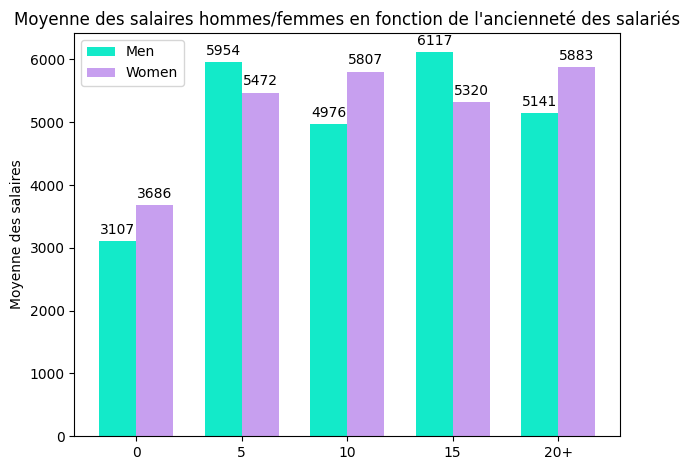

In [348]:
x = np.arange(len(lalo))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, anm1, width, label='Men', color = an_colors_2)
rects2 = ax.bar(x + width/2, anf1, width, label='Women', color = an_colors_1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Moyenne des salaires')
ax.set_title("Moyenne des salaires hommes/femmes en fonction de l'ancienneté des salariés")
ax.set_xticks(x)
ax.set_xticklabels(lalo)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Observation:
- Les salariés(femme) de moins de 5 ans d'ancienneté ont en moyenne un salaire légerement plus élevé que les salariés(homme) de moins de 5 ans 
- cette tendence s'inverse pour entre 5-10 d'ancienneté
- Les femmes reprennent légeremment le dessus entre 10-15
- Les homme reprennent le dessus entre 15-20
- Les femmes reprennent le dessus pour les salariés qui on plus de 20 ans d'expérience

Conclusion :
- Je ne voit pas de réelle influence sur le salaire en fonction d'être un homme ou une femme


## Bar plot horizontal observant le total de salariés classés par Services

In [349]:
df["Service"].value_counts()

Consultant         69
Commercial         52
RH                 43
Compta Finances    41
Marketing          36
R&D                15
Name: Service, dtype: int64

In [350]:
s_service = df["Service"].value_counts()
s_service_colors = sns.color_palette("hls", 8)
s_service_labels = ["Consultant", "Commercial", "RH", "Compta Finances", "Marketing", "R&D"]

Text(0.5, 1.0, 'Total of salaries per Services')

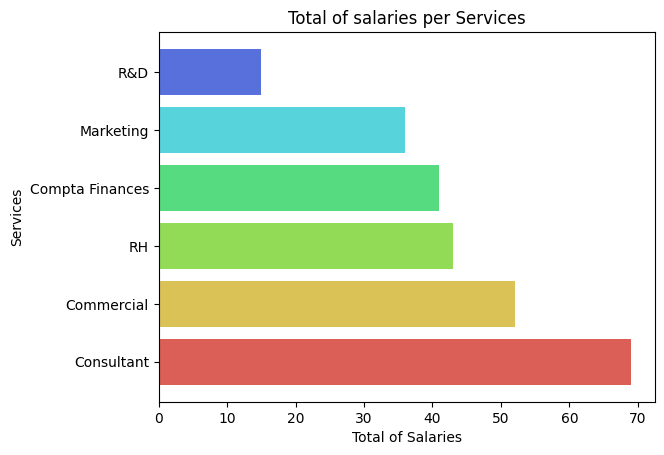

In [351]:
fig, ax = plt.subplots()

# df = df.sort_values(by= ['Service'])

ax.barh(data = df, y = s_service_labels, width = s_service, color = s_service_colors)
ax.set_xlabel("Total of Salaries")
ax.set_ylabel("Services")
ax.set_title("Total of salaries per Services")

Observation: 
- Il y'a deux extrême : beaucoup de salariés dans le service "Consultant" et peu dans le service "R&D"
- Les autres services ont environ le même nombre de salariés et se situe entre ces deux extrême ("Consultant" et "R&D")
- Mais on peux constater qu'il y a une légère augmentation du nombre de salarié dans le service "Commercial"

Conclusion : 
- L'entreprise à une grande part d'activité dans le domaine de la consultation. 
- Elle place une partie de ses salariés dans le domaine de la R&D : pour exploiter de nouvelles ressources, trouver de nouvelles idée, développement, recherche... .
- Je pense qu'il serait pertinent réfléchir aux différentes possibilités qui permettrai d'augmenter l'effectif de salariés dans la R&D. Pour amélioré la productivité tout en évitant épuiser inutilement les ressources de l'entreprise

## A pie-chart to see the proportion of work accident in the company

In [352]:
df

,id_salarié,Ancienneté_an,Distance domicile/Travail,Service,Work_accident,Niveau de satisfaction,Contrat,Durée hebdo,Salaire base mensuel,%variable_moyen,...,Sexe,Prénom/Nom,Telephone,Date_naissance,Etat Civil,Enfants,age,tranche_age,Work_accident_bin,An_cienneté
0,16000206-8278,12.6,59.0,Marketing,Non,67.0,CDI,35.0,6583.8500,13.0,...,F,Pascale Duclos,677289138.0,1958-12-07,non précisé,2.0,65,"(60, 70]",0,"[10, 15]"
1,16011205-0331,11.8,31.0,Commercial,Oui,66.0,CDI,24.0,4974.3200,32.0,...,F,Nicole Affré,640934749.0,1957-04-23,Célibataire,2.0,66,"(60, 70]",1,"[10, 15]"
2,16020327-1465,11.9,65.0,RH,Non,59.0,CDI,32.0,8860.8000,19.0,...,F,Marie-Claire Bachelet,609243379.0,1973-08-19,Célibataire,3.0,50,"(40, 50]",0,"[10, 15]"
3,16020701-3376,10.2,59.0,Compta Finances,Non,60.0,CDI,35.0,8328.0167,14.0,...,F,Claire Chagnon,683289092.0,1981-10-09,Célibataire,1.0,42,"(40, 50]",0,"[10, 15]"
4,16020725-8401,7.9,59.0,Consultant,Non,34.0,CDI,35.0,7304.2667,17.0,...,F,Séverine Gaumont,684333280.0,1979-04-26,Marié,0.0,44,"(40, 50]",0,"[5, 10]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,16960906-7989,3.3,15.0,R&D,Oui,81.0,CDD,35.0,2848.3000,15.0,...,H,Fabien Cerf,626873728.0,1983-03-04,non précisé,0.0,40,"(30, 40]",1,"[0, 5]"
252,16970415-1050,21.7,59.0,Consultant,Non,98.0,CDI,35.0,1697.1500,17.0,...,H,Denis Vérany,607599922.0,1963-10-25,Marié,3.0,60,"(50, 60]",0,[20+]
253,16981206-3817,13.0,68.0,RH,Oui,62.0,CDI,35.0,3705.2167,29.0,...,F,Flora Lajoie,651981019.0,1970-01-19,non précisé,1.0,53,"(50, 60]",1,"[10, 15]"
254,16990414-3527,10.8,32.0,Consultant,Non,39.0,CDI,35.0,4296.7167,39.0,...,H,Aurélien Beaubois,660488569.0,1955-07-01,Célibataire,0.0,68,"(60, 70]",0,"[10, 15]"


In [353]:
wa_p = df["Work_accident"].value_counts()
wa_labels = ["Oui", "Non"]
wa_colors = ["#13EAC9", "#C79FEF"]

In [354]:
wa_p

Oui    129
Non    127
Name: Work_accident, dtype: int64

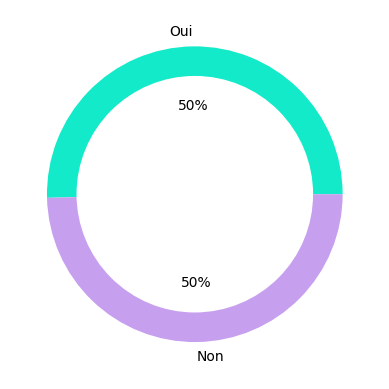

In [355]:
plt.pie(x = wa_p, labels = wa_labels, colors = wa_colors, autopct ='%.0f%%')

# Changing the pie chart to dont chart

centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

observation :
    - il y'a autant de salarié qui ont eu un accident, qu'il y'en a qui n'en ont pas eu

## A bar chart to see the Total of work accident in the compagny per sexe 

In [356]:
wa_s_pivot = pd.pivot_table(data = df, index = "Sexe", values = "Work_accident_bin", aggfunc = 'count')

In [357]:
wa_s_pivot

,Work_accident_bin
Sexe,
F,125
H,131


In [358]:
wa_s_pivot_np = wa_s_pivot.to_numpy()

In [359]:
wa_sf = wa_s_pivot_np[0, :]
wa_sm = wa_s_pivot_np[1, :]
wa_s = np.reshape(wa_s_pivot_np, (2,))
wa_s_labels = ["Femme", "Homme"]
wa_s_colors = ["#C79FEF", "#13EAC9"]

In [360]:
wa_s

array([125, 131])

Text(0.5, 1.0, "Le total d'accident de travail des salariés par sexe")

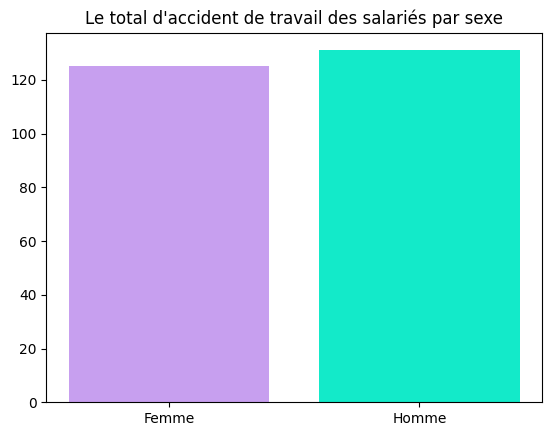

In [399]:
fig, ax = plt.subplots()

ax.bar(wa_s_labels, wa_s, color = wa_s_colors)

ax.set_title("Le total d'accident de travail des salariés par sexe")

Observation :
    - il y'a autant salariés homme que de salariés femme qui ont eu un accident
    
Conclusion : 
    - Être un homme ou une femme n'influe pas sur les chances d'avoir un accident de travail 

## a bar chart to see the total of work accident in the company per Service

In [362]:
wa_services_pivot = pd.pivot_table(data = df, index = "Service", columns= "Work_accident", values = "Work_accident_bin", 
                                   aggfunc = 'count')

In [363]:
wa_services_pivot

Work_accident,Non,Oui
Service,,
Commercial,21,31
Compta Finances,24,17
Consultant,36,33
Marketing,20,16
R&D,4,11
RH,22,21


In [364]:
wa_services_np = wa_services_pivot.to_numpy()

In [365]:
wa_service_non = wa_services_np[:, 0]
wa_service_oui = wa_services_np[:, 1]
wa_service_non_sorted = sorted(wa_service_non)
wa_service_oui_sorted = sorted(wa_service_oui)
wa_service_non_labels = ["R&D", "Marketing", "Commercial", "RH", "Compta Finances", "Consultant"]
wa_service_oui_labels = ["R&D", "Marketing", "Compta Finances",  "RH", "Commercial", "Consultant"]
wa_service_non_colors = ["#EF4026", "#DBB40C", "#13EAC9", "#00FF00", "#BBF90F", "#0343DF"]
wa_service_oui_colors = ["#EF4026", "#DBB40C", "#BBF90F", "#00FF00", "#13EAC9","#0343DF"]

In [403]:
wa_service_non_sorted

[4, 20, 21, 22, 24, 36]

In [402]:
wa_service_oui_sorted

[11, 16, 17, 21, 31, 33]

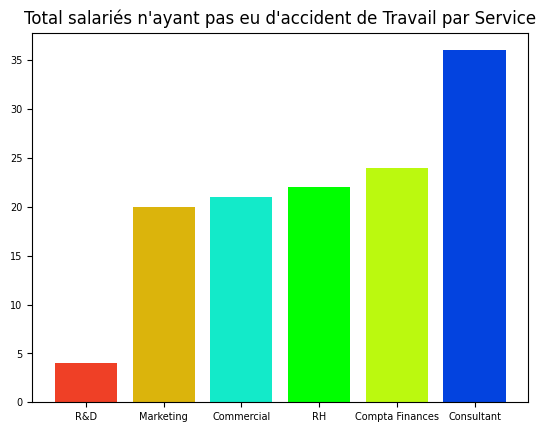

In [400]:
fig, ax = plt.subplots()
plt.bar(wa_service_non_labels, wa_service_non_sorted, color = wa_service_non_colors)

plt.title("Total salariés n'ayant pas eu d'accident de Travail par Service")
plt.tick_params(axis = 'both', labelsize = 7)

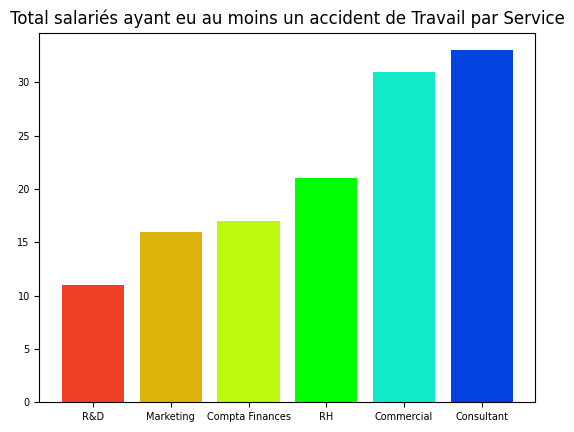

In [401]:
fig, ax = plt.subplots()

plt.bar(wa_service_oui_labels, wa_service_oui_sorted, color = wa_service_oui_colors)

plt.title("Total salariés ayant eu au moins un accident de Travail par Service")
plt.tick_params(axis = 'both', labelsize = 7)

observation : 
    - On peut voir une forte augmentation d'accident de travail pour les salariés des services "Commercial" et "Consultant
    - Au contraire les salariés du service "R&D" ont bcp moins d'accident de travail 
    - Les autres services ont des total d'accidents de travail se situant entre ces deux extremes
    
Conclusion : Cettes forte augmentation dans les services "Commercial" et "Consultant" est surêment du au fait que leurs salariés ont besoin de se déplacer à de nombreuse reprise pour remplir leurs fonctions. 

On voit en effet que les R&D (qui n'ont pas vraiment besoin de se déplacer du au temps passé à se concentrer sur leurs recherches), sont le service qui ont le moins d'accident de travail

## Niveau de satisfaction des salariés par sexe 

In [369]:
sas_pivot_table = pd.pivot_table(data = df,index = "Sexe", values = "Niveau de satisfaction", aggfunc = np.mean)

In [370]:
sas_pivot_table

,Niveau de satisfaction
Sexe,
F,49.888000
H,51.450382


In [371]:
sas_np = sas_pivot_table.to_numpy()
sas_np = sas_np.reshape(2,)
sas_f = sas_np[0]
sas_m = sas_np[1]
sas_labels = ["Femme", "Homme"]
sas_colors = ["#C79FEF", "#13EAC9"]

Text(0.5, 1.0, 'Niveau de satifaction des salariés par sexe')

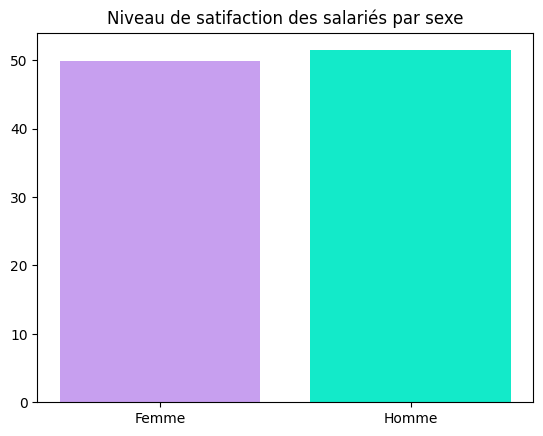

In [404]:
fig, ax = plt.subplots()

ax.bar(sas_labels, sas_np, color = sas_colors)

ax.set_title("Niveau de satifaction des salariés par sexe")

Observation:
- Les femmes et les hommes ont globalement le même niveau de satisfaction
- Globalement, être un homme ou une femme dans l'entreprise n'influe pas notre satisfaction

In [373]:
sast_pivot_table = pd.pivot_table(data = df,index = "tranche_age", columns = "Sexe", values = "Niveau de satisfaction", 
                                 aggfunc = np.mean)

In [374]:
sast_pivot_table

Sexe,F,H
tranche_age,,
"(30, 40]",50.600000,47.733333
"(40, 50]",48.114286,52.725000
"(50, 60]",50.040816,53.938776
"(60, 70]",51.576923,47.111111


In [375]:
sast_np = sast_pivot_table.to_numpy()
sast_f = sast_np[:, 0]
sast_m = sast_np[:, 1]
sast_f1 = sast_f.astype(int)
sast_m1 = sast_m.astype(int)
sast_colors_1 = ["#C79FEF"]
sast_colors_2 = ["#13EAC9"]

In [376]:
sast_m

array([47.73333333, 52.725     , 53.93877551, 47.11111111])

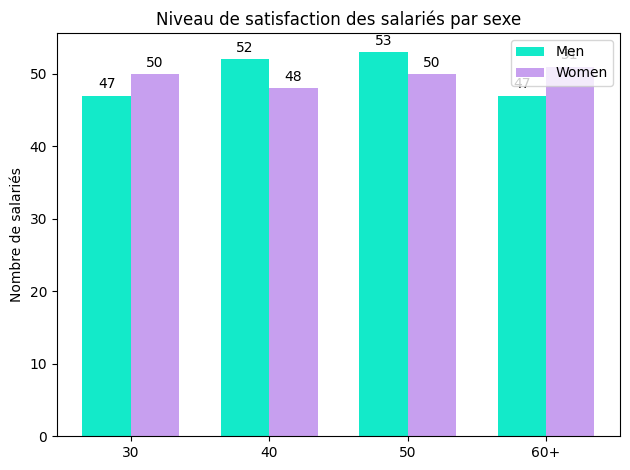

In [377]:
labels = ["30", "40", "50", "60+"]
men_means = list(sast_m1)
women_means = list(sast_f1)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men', color = sast_colors_2)
rects2 = ax.bar(x + width/2, women_means, width, label='Women', color = sast_colors_1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nombre de salariés')
ax.set_title('Niveau de satisfaction des salariés par sexe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Observation:
- Les femmes et les hommes ont globalement le même niveau de satisfaction
- Globalement, être un homme ou une femme dans l'entreprise n'influe pas notre satisfaction

## CDI par sexe 

In [378]:
df_CDI = df.loc[df["Contrat"] == "CDI"]
df_CDD = df.loc[df["Contrat"] == "CDD"]

In [379]:
cdi_pivot_table = pd.pivot_table(data = df_CDI, index = "Sexe", values = "Contrat", aggfunc = 'count')

In [380]:
cdi_pivot_table

,Contrat
Sexe,
F,114
H,126


In [381]:
cdi_1_pivot_table = pd.pivot_table(data = df_CDI, index = "tranche_age", columns = "Sexe", values = "Contrat",
                                aggfunc = 'count')
cdi_1_pivot = cdi_1_pivot_table[3:7]

In [382]:
cdi_1_pivot

Sexe,F,H
tranche_age,,
"(30, 40]",12,14
"(40, 50]",35,37
"(50, 60]",43,48
"(60, 70]",24,27


In [383]:
cdi_np = cdi_pivot_table.to_numpy()
cdi_np = cdi_np.reshape(2,)
cdi_1_np = cdi_1_pivot.to_numpy()

cdi_1f = cdi_1_np[:, 0]
cdi_1m = cdi_1_np[:, 1]
cdi_labels = ["Femme", "Homme"]
cdi_1_labels = ["30", "40", "50", "60"]
cdi_colors = ["#C79FEF", "#13EAC9"]
cdi_1_colors_f = ["#C79FEF"]
cdi_1_colors_m = ["#13EAC9"]

Text(0, 0.5, 'Nombre de salariés')

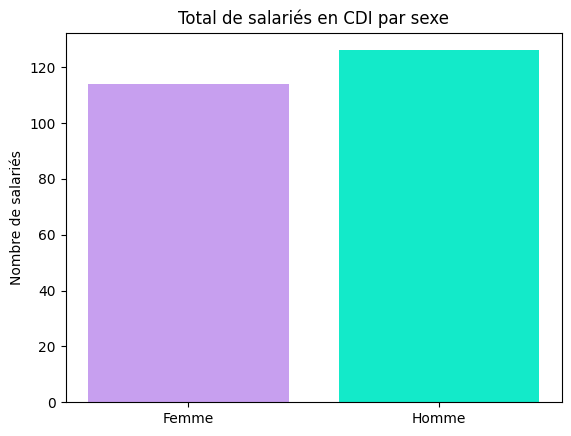

In [384]:
fig, ax = plt.subplots()

ax.bar(cdi_labels, cdi_np, color = cdi_colors)

ax.set_title('Total de salariés en CDI par sexe')
ax.set_ylabel('Nombre de salariés')

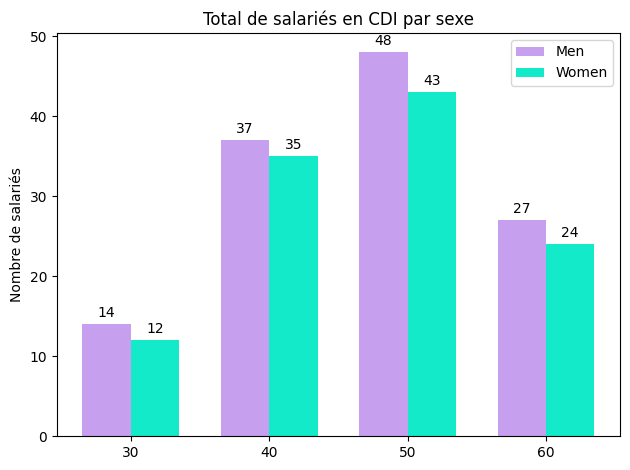

In [405]:
x = np.arange(len(cdi_1_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cdi_1m, width, label='Men', color = cdi_1_colors_f)
rects2 = ax.bar(x + width/2, cdi_1f, width, label='Women', color = cdi_1_colors_m)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nombre de salariés')
ax.set_title('Total de salariés en CDI par sexe')
ax.set_xticks(x)
ax.set_xticklabels(cdi_1_labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Observations:
- On voit qu'il n'a pas une différence significative du nombre de salariés homme ou femme en CDI.
- Donc on ne peut pas dire qu'être un homme ou une femme augmente les chances de décrocher un CDI.

## CDD par Sexe

In [386]:
df_CDD = df.loc[df["Contrat"] == "CDD"]

In [387]:
cdd_pivot_table = pd.pivot_table(data = df_CDD, index = "Sexe", values = "Contrat", aggfunc = 'count')

In [388]:
cdd_pivot_table 

,Contrat
Sexe,
F,11
H,5


In [389]:
cdd_1_pivot_table = pd.pivot_table(data = df_CDD, index = "tranche_age", columns = "Sexe", values = "Contrat",
                                aggfunc = 'count')
cdd_1_pivot = cdd_1_pivot_table[3:7]

In [390]:
cdd_1_pivot

Sexe,F,H
tranche_age,,
"(30, 40]",3,1
"(40, 50]",0,3
"(50, 60]",6,1
"(60, 70]",2,0


In [391]:
cdd_np = cdd_pivot_table.to_numpy()
cdd_np = cdd_np.reshape(2,)
cdd_1_np = cdd_1_pivot.to_numpy()

cdd_1f = cdd_1_np[:, 0]
cdd_1m = cdd_1_np[:, 1]
cdd_labels = ["Femme", "Homme"]
cdd_1_labels = ["30", "40", "50", "60"]
cdd_colors = ["#C79FEF", "#13EAC9"]
cdd_1_colors_f = ["#C79FEF"]
cdd_1_colors_m = ["#13EAC9"]

Text(0, 0.5, 'Nombre de salariés')

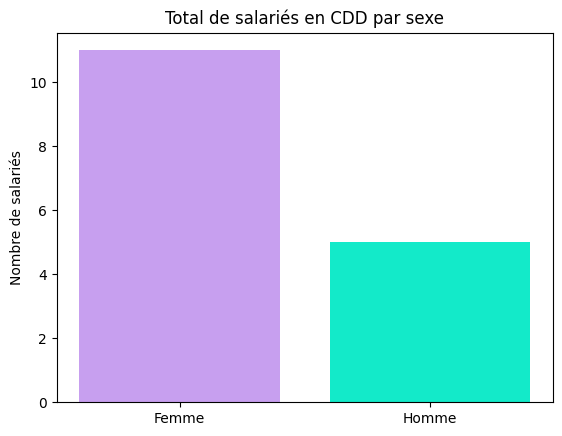

In [392]:
fig, ax = plt.subplots()

ax.bar(cdd_labels, cdd_np, color = cdd_colors)

ax.set_title('Total de salariés en CDD par sexe')
ax.set_ylabel('Nombre de salariés')

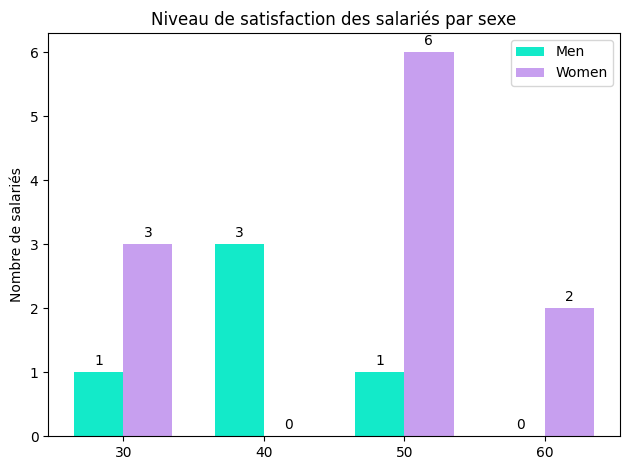

In [393]:
x = np.arange(len(cdd_1_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cdd_1m, width, label='Men', color = cdd_1_colors_m)
rects2 = ax.bar(x + width/2, cdd_1f, width, label='Women', color = cdd_1_colors_f)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nombre de salariés')
ax.set_title('Niveau de satisfaction des salariés par sexe')
ax.set_xticks(x)
ax.set_xticklabels(cdd_1_labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Observation:
- je pense que l'on possède trop peu d'information pour en conclure qu'il y'a une réelle influence d'être un homme ou une femme sur les postes en cdd